obtained w:  [1. 2. 3.] true w: [1 2 3]
obtained b:  [5.] true b: 5


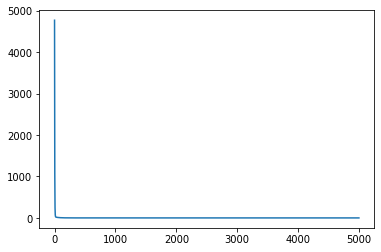

In [20]:
import numpy as np

w_true = np.array([1, 2, 3])
b_true = 5

w = np.random.rand(3, 1).squeeze(1)
b = np.random.rand(1)

X = np.random.rand(100, 3)
y = np.dot(X, w_true) + b_true

gamma = 0.1
losses = []

for i in range(5000):
  errors = y - (np.dot(X, w) + b)
  dEdw = np.dot(X.T, errors) / 100
  dEdb = errors.sum() / 100

  loss = (errors**2).sum()

  w += gamma * dEdw
  b += gamma * dEdb

  losses.append(loss)

print('obtained w: ', w, 'true w:', w_true)
print('obtained b: ', b, 'true b:', b_true)

from matplotlib import pyplot as plt
plt.plot(losses)

obtained w:  tensor([1.0000, 2.0000, 3.0000], requires_grad=True) true w: tensor([1., 2., 3.])
obtained b:  tensor([5.0000], requires_grad=True) true b: 5


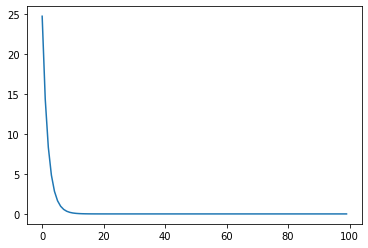

In [1]:
import torch

w_true = torch.Tensor([1, 2, 3])
b_true = 5

w = torch.randn(3, requires_grad = True)
b = torch.randn(1, requires_grad = True)
X = torch.randn(100, 3)
y = torch.mv(X, w_true) + b_true
gamma = 0.1
losses = []

for i in range(100):
  w.grad = None
  b.grad = None

  y_pred = torch.mv(X,w) + b

  loss = torch.mean((y- y_pred)**2)
  loss.backward()

  w.data = w.data - gamma * w.grad.data
  b.data = b.data - gamma * b.grad.data

  losses.append(loss.item())

print('obtained w: ', w, 'true w:', w_true)
print('obtained b: ', b, 'true b:', b_true)

from matplotlib import pyplot as plt
plt.plot(losses)